In [1]:
import PIL
import PIL.Image
import numpy as np

In [2]:
img = PIL.Image.open('data/raw/aachen_000000_000019_trainId_label.png')

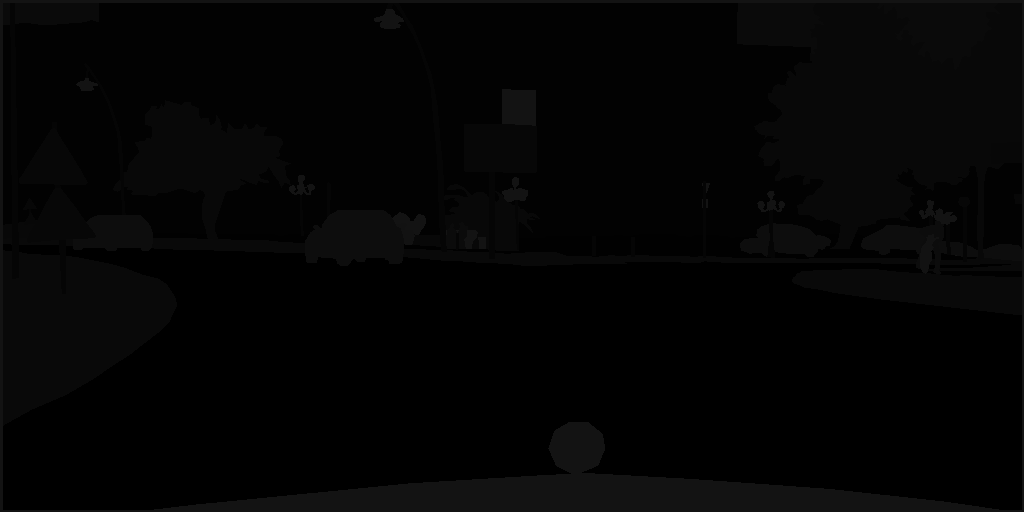

In [3]:
img

In [4]:
img_arr = np.array(img).astype(np.uint8)

In [5]:
img_arr

array([[19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       ...,
       [19, 19, 19, ...,  0, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19]], dtype=uint8)

In [6]:
img_arr.shape

(512, 1024)

In [7]:
import matplotlib.pyplot as plt

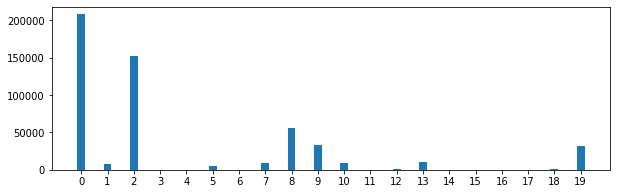

In [8]:
plt.figure(figsize=(10, 3))
u, inv = np.unique(img_arr.reshape(-1), return_inverse=True)
counts = np.bincount(inv)
plt.bar(u, counts, width=0.3)
plt.xticks(np.arange(0, 20, 1))
plt.show()

In [9]:
img = PIL.Image.open('data/raw/aachen_000000_000019.png')

In [10]:
img_arr = (np.array(img).astype(np.float32) / 256.0)

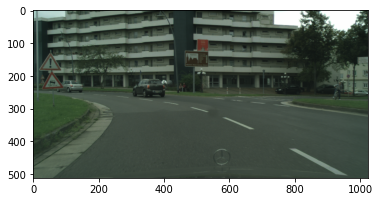

In [11]:
plt.imshow(img_arr)

In [12]:
import lib.training
from lib.data import SegmentationDataset
import torch.utils.data

In [13]:
shared_transform, train_transform, test_transform = lib.training.get_transforms()

In [14]:
train_dataset = SegmentationDataset(
    split='train', transforms=train_transform, shared_transform=shared_transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=28,
                                                shuffle=False, num_workers=0,
                                                drop_last=True)

In [15]:
batch = next(train_dataloader.__iter__())

In [16]:
img, gt = batch
print(img.shape)
print(gt.shape)

torch.Size([28, 3, 512, 1024])
torch.Size([28, 1, 512, 1024])


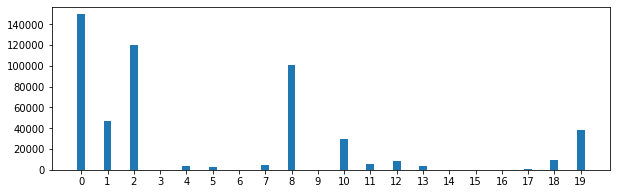

In [17]:
plt.figure(figsize=(10, 3))
u, inv = np.unique(gt[0, 0, :, :].detach().numpy().reshape(-1), return_inverse=True)
counts = np.bincount(inv)
plt.bar(u, counts, width=0.3)
plt.xticks(np.arange(0, 20, 1))
plt.show()

In [18]:
def recover_img(img):
    mean_channels = torch.from_numpy(
        np.load('./data/mean_channels.npy').astype(np.float32))
    std_channels = torch.from_numpy(
        np.load('./data/std_channels.npy').astype(np.float32))
    return ((img.permute(1, 2, 0) * (std_channels / 256)) + (mean_channels / 256))

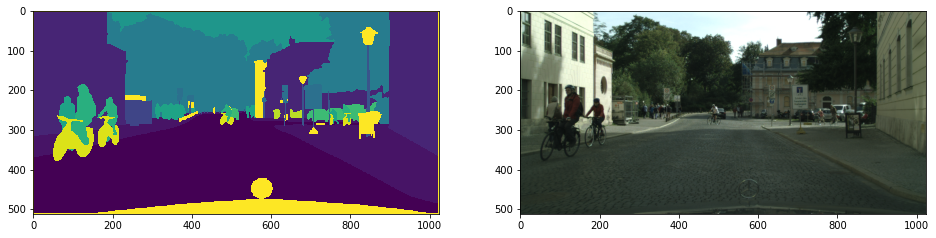

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(gt[0, 0, :, :].detach().numpy(), interpolation='nearest')
recovered = recover_img(img[0, :, :, :]).detach().numpy()
axes[1].imshow(recovered)

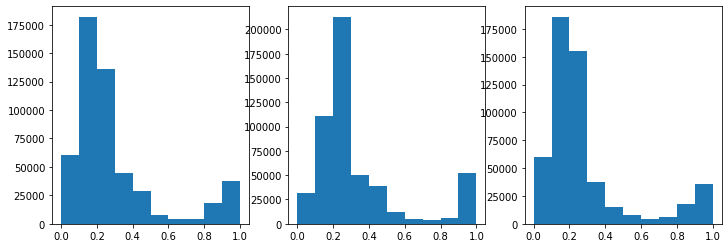

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    _ = axes[i].hist(recovered[:, :, i].reshape(-1))

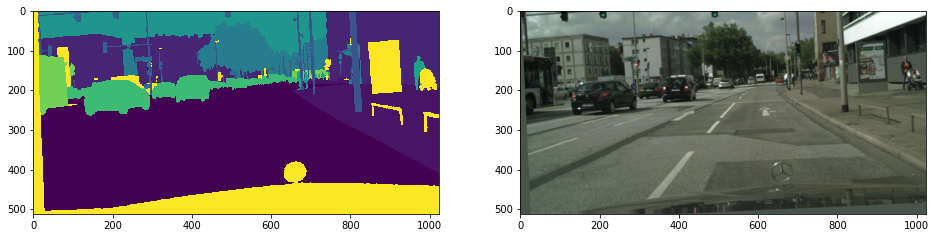

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(gt[1, 0, :, :].detach().numpy(), interpolation='nearest')
axes[1].imshow(recover_img(img[1, :, :, :]).detach().numpy())

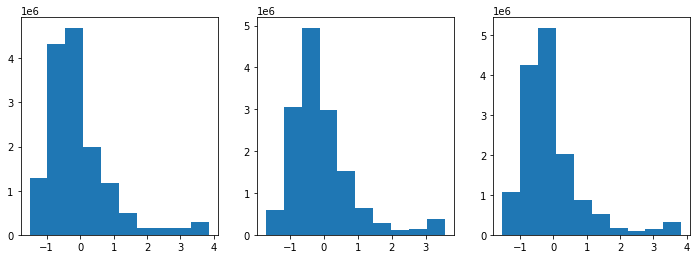

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].hist(img[:, i, :, :].flatten().numpy())